In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
inpath = '/media/ck/Elements/Africa/WestAfrica/GPM/Semeena_EnsembleStudy/3B*.SUB.nc4'

In [4]:
ds = xr.open_mfdataset(inpath)

In [5]:
ds = ds.sel(time='2019-04-25').sel(lon=slice(-9,-4), lat=slice(10,15))

In [6]:
ds

<xarray.Dataset>
Dimensions:          (lat: 50, lon: 50, time: 48)
Coordinates:
  * time             (time) datetime64[ns] 2019-04-25 ... 2019-04-25T23:30:00
  * lon              (lon) float32 -8.95 -8.85 -8.75 -8.65 ... -4.25 -4.15 -4.05
  * lat              (lat) float32 10.05 10.15 10.25 10.35 ... 14.75 14.85 14.95
Data variables:
    HQprecipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    IRprecipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-HH/06;\n...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=6a;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-HHR.MS.MRG.3IMERG.20190425-S00...
    history_L34RS:                          'Created by L34RS v1.4.2 @ NASA G...
    CDO:                                    Climate Data Operators version 1....

In [7]:
morning = ds.where(ds['time.hour']<9).sum('time')

In [8]:
mid = ds.where((ds['time.hour']>9)&(ds['time.hour']<13)).sum('time')

In [9]:
night = ds.where((ds['time.hour']>13)).sum('time')

In [12]:
import cartopy.feature as cfeature
def draw_map(ax, ds):

    lat = ds['lat']
    lon = ds['lon']

    plt.contourf(lon, lat, ds['HQprecipitation'], transform=ccrs.PlateCarree(), levels=np.arange(0.5,12.1,1), cmap='viridis')
    plt.colorbar()
    plt.contour(lon,lat,morning['HQprecipitation'], transform=ccrs.PlateCarree(), levels=[5,5.0001], colors='k')
    
    #plt.contour(lon, lat, ds['rain']/100, transform=ccrs.PlateCarree(), cmap='jet')
    
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


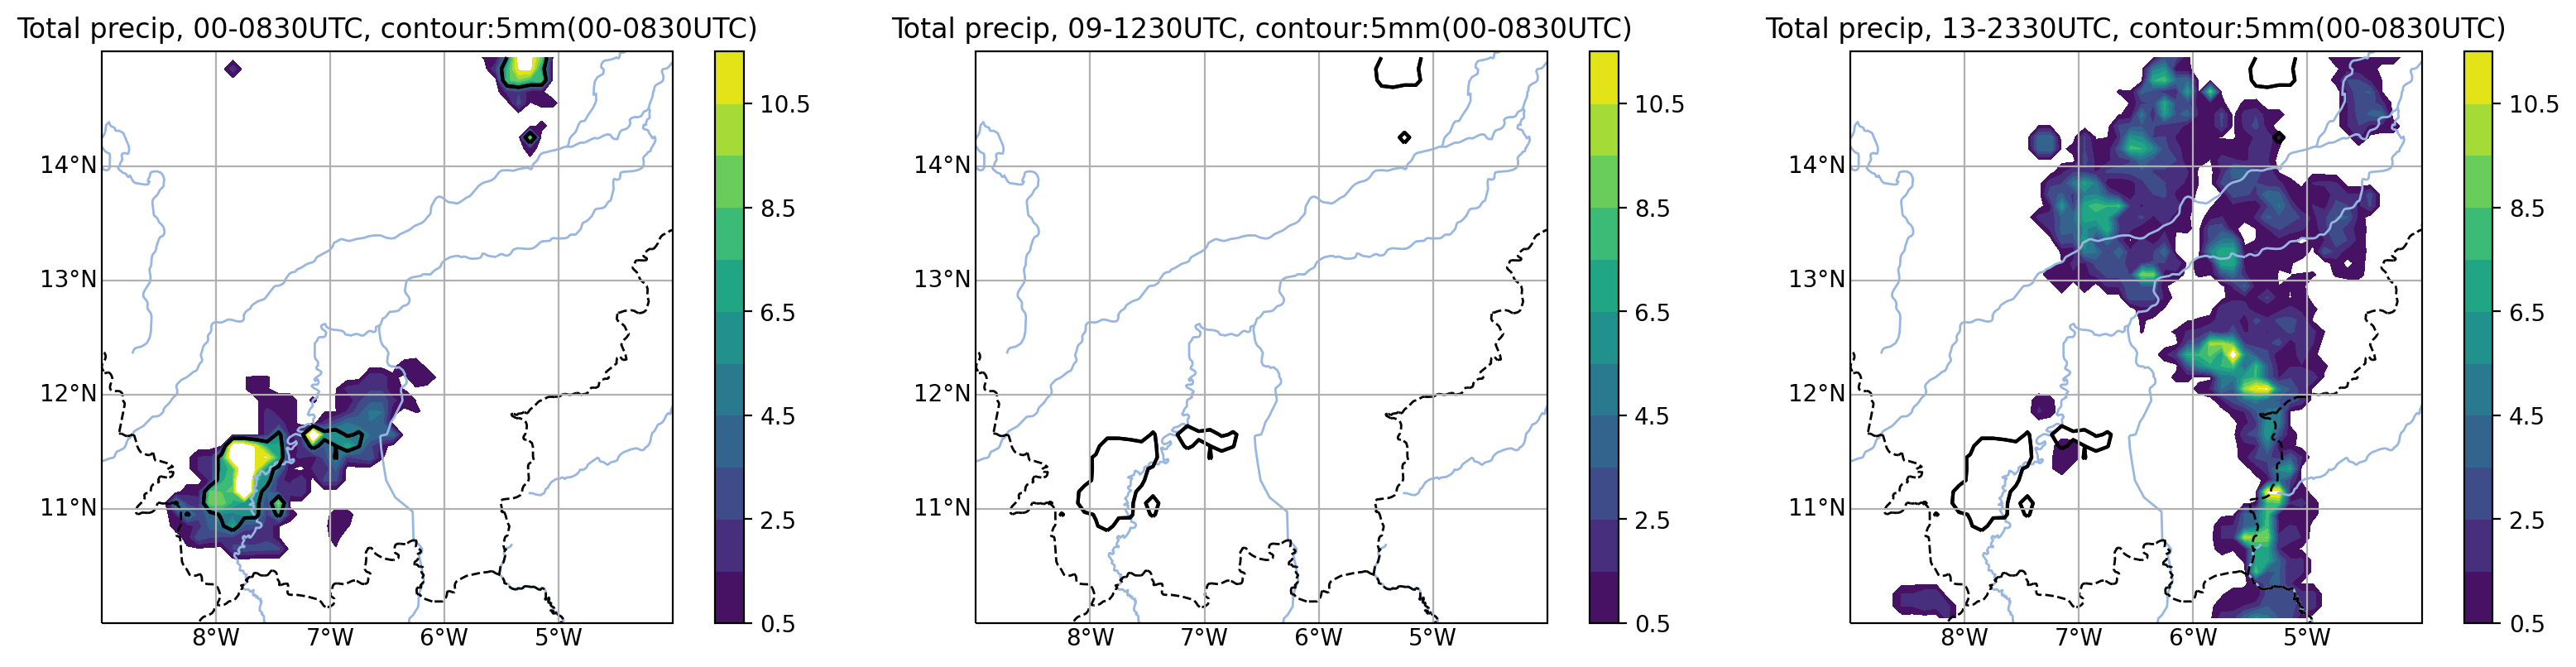

In [13]:
f = plt.figure(figsize=(16,4), dpi=200)
ax = f.add_subplot(131,projection=ccrs.PlateCarree())
draw_map(ax, morning)
plt.title('Total precip, 00-0830UTC, contour:5mm(00-0830UTC)')
ax.set_ylim(10,15)
ax.set_xlim(-9,-4)

ax = f.add_subplot(132,projection=ccrs.PlateCarree())
draw_map(ax, mid)
plt.title('Total precip, 09-1230UTC, contour:5mm(00-0830UTC)')
ax.set_ylim(10,15)
ax.set_xlim(-9,-4)

ax = f.add_subplot(133,projection=ccrs.PlateCarree())
draw_map(ax, night)
plt.title('Total precip, 13-2330UTC, contour:5mm(00-0830UTC)')
ax.set_ylim(10,15)
ax.set_xlim(-9,-4)
plt.tight_layout()
#f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/IMERG_HQprecip_20190425.jpg')

In [13]:
ds

<xarray.Dataset>
Dimensions:  (lat: 131, lon: 301)
Coordinates:
    time     object ...
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 11.75 11.85 11.95
  * lat      (lat) float32 3.95 4.05 4.15 4.25 4.35 ... 16.65 16.75 16.85 16.95
Data variables:
    rain     (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    mcs      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    tir      (lat, lon) int16 0 0 0 0 0 0 ... 1989 1900 1900 1900 1900 1900

<xarray.Dataset>
Dimensions:  (x: 64, y: 123)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -59.176191187626294
    T90perc:    -53.0
    meanT_cut:  -59.176191187626294
    area:       819
    area_cut:   819


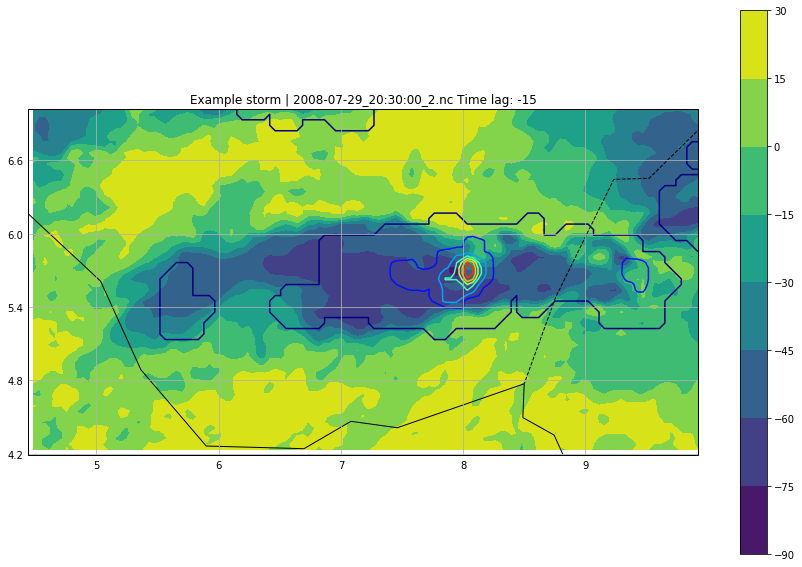

In [45]:
draw_map(storm_case2)

<xarray.Dataset>
Dimensions:  (x: 57, y: 83)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -56.980416764160005
    T90perc:    -53.0
    meanT_cut:  -57.831663578746735
    area:       484
    area_cut:   372


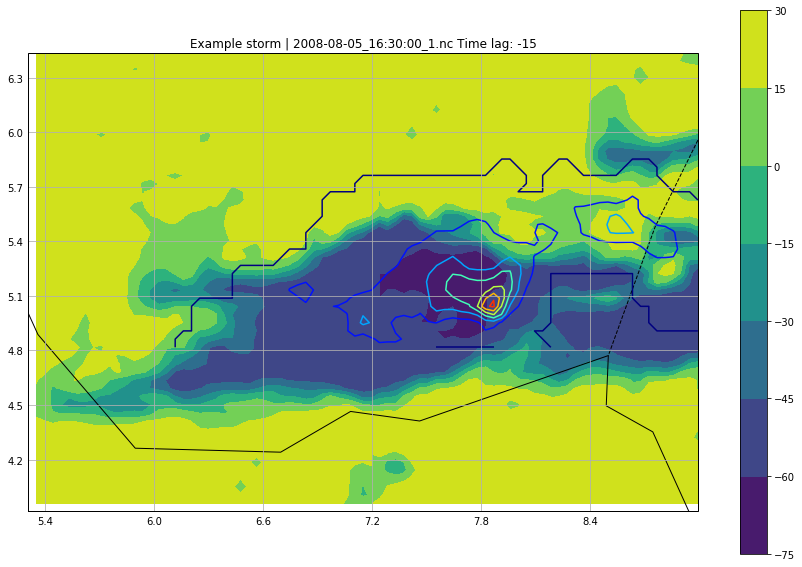

In [46]:
draw_map(storm_case3)

<xarray.Dataset>
Dimensions:  (x: 58, y: 76)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -58.20546566350775
    T90perc:    -52.0
    meanT_cut:  -58.20546566350775
    area:       281
    area_cut:   281


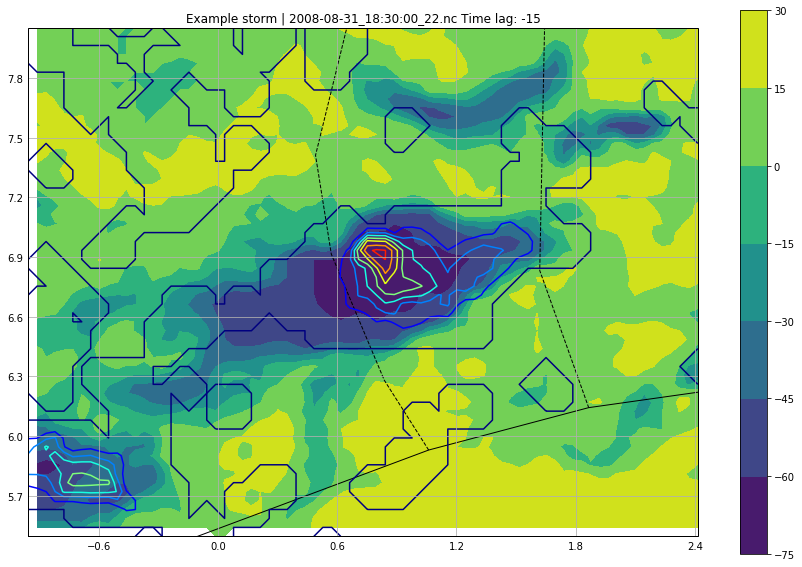

In [49]:
draw_map(storm_case4)

In [75]:
mf = xr.open_mfdataset('/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2006/09/*.nc4', concat_dim='time', autoclose=True)

In [70]:
mf

<xarray.Dataset>
Dimensions:            (lat: 141, lon: 301, time: 1488)
Coordinates:
  * lat                (lat) float32 3.95 4.05 4.15 4.25 ... 17.75 17.85 17.95
  * lon                (lon) float32 -18.05 -17.95 -17.85 ... 11.75 11.85 11.95
  * time               (time) datetime64[ns] 2006-07-01 ... 2006-07-31T23:30:00
Data variables:
    HQprecipSource     (time, lon, lat) float32 dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
    HQprecipitation    (time, lon, lat) float32 dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
    HQobservationTime  (time, lon, lat) timedelta64[ns] dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauth...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dime

In [71]:
precip = mf['HQprecipitation'].sum('time')

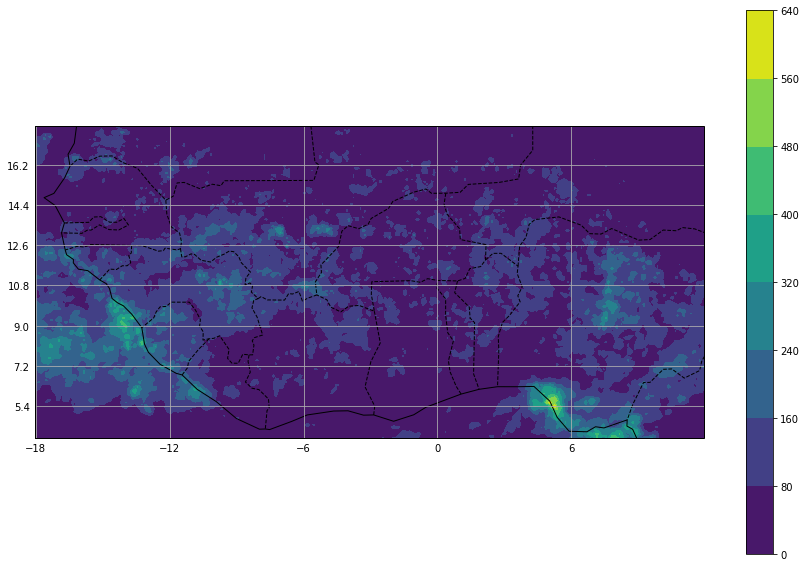

In [74]:
f=plt.figure(figsize=(15,10))
lat = precip['lat']
lon = precip['lon']
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(lon, lat, precip.T, transform=ccrs.PlateCarree())
plt.colorbar()
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.show()

In [102]:
#define some plotting parameters
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})#define color palettes
pal_base = sns.cubehelix_palette(19, rot=-.25, light=.7)
pal_SOS = sns.cubehelix_palette(19, rot=-.5, light=.7)
pal_EOS  = sns.cubehelix_palette(19, rot=.25, light=.7)fig, ax = plt.subplots(19,sharex=True)
fig.set_size_inches(11,8)
for i in range(19):
    sns.kdeplot(df[df['year'] == 2000+i]["SOS"],color=pal_SOS[i],bw_adjust=.5, 
                clip_on=True,fill=True,ax=ax[i], alpha=1, linewidth=1.5)
    
    sns.kdeplot(df[df['year'] == 2000+i]["SOS"],clip_on=False, color="w",ax=ax[i], lw=2, bw_adjust=.5)
    
        
    
    
    
    sns.kdeplot(df[df['year'] == 2000+i]["EOS"],color=pal_EOS[i],bw_adjust=.5, 
                clip_on=True,fill=True,ax=ax[i], alpha=1, linewidth=1.5)
    
    sns.kdeplot(df[df['year'] == 2000+i]["EOS"],clip_on=False, color="w",ax=ax[i], lw=2, bw_adjust=.5)
    
    
    for pos in ['top','bottom','left','right']:
        ax[i].spines[pos].set_visible(False)
            
    ax[i].tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    ax[i].set_ylabel((str(2000+i)+'/'+str(2001+i)),color=pal_SOS[i],rotation=0)
    ax[i].yaxis.set_label_coords(-.005,+.1)
    ax[i].set_xlabel(' ')    
ax[-1].spines['bottom'].set_visible(True)
ax[-1].spines['bottom'].set_position(('axes',-1))
ax[-1].spines['bottom'].set_color(pal_base[-1])ax[-1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,  # labels along the bottom edge are off
    colors=pal_base[-1]) ax[-1].xaxis.label.set_color(pal_base[-1])
ax[-1].set_xlabel('SOS and EOS distributions',color=pal_EOS[-1]);fig.subplots_adjust(hspace=-.25)

SyntaxError: invalid syntax (<ipython-input-102-d9d7466b9769>, line 5)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)